In [10]:
# Lab 1: Exploratory Data Analysis (EDA)

Student Name: Vinodh Jeganathan
Student Id: 22179011    

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
bank_data = pd.read_csv('./bank.csv')


In [13]:
#Quick exploration of data
# first 10 rows
bank_data.head(10)

age            job   marital  education default  balance housing loan  \
0  32.0     technician    single   tertiary      no      392     yes   no   
1  39.0     technician  divorced  secondary      no      688     yes  yes   
2  59.0        retired   married  secondary      no     1035     yes  yes   
3  47.0    blue-collar   married  secondary      no      398     yes  yes   
4  54.0        retired   married  secondary      no     1004     yes   no   
5  46.0  self-employed  divorced   tertiary      no      926     yes   no   
6  34.0    blue-collar   married  secondary      no     1924     yes  yes   
7  45.0       services  divorced  secondary      no      396     yes  yes   
8  58.0     management  divorced   tertiary      no      315     yes   no   
9  49.0     management  divorced   tertiary      no    20727      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   
5  cellular    1   apr       463         1    133         3  failure   
6  cellular    1   apr       161         2    253         1  failure   
7  cellular    1   apr       251         4    329         4  failure   
8  cellular    1   apr       121         2    135         2  failure   
9  cellular    1   apr       285         3    132         2  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no  
5         no  
6         no  
7         no  
8         no  
9         no

In [14]:
# last 10 rows
bank_data.tail(10)

age           job   marital  education default  balance housing loan  \
1990  36.0    technician   married   tertiary      no      376      no   no   
1991  39.0        admin.  divorced  secondary      no      112      no   no   
1992  78.0       retired  divorced    primary      no      527      no   no   
1993  35.0    management   married        NaN      no     2326     yes  yes   
1994  26.0       student    single  secondary      no      655      no   no   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1990   cellular   16   sep       173         1     -1         0      NaN   
1991   cellular   16   sep       574         3     -1         0      NaN   
1992   cellular   16   sep       193         1     -1         0      NaN   
1993   cellular   16   sep       319         1     -1         0      NaN   
1994   cellular   16   sep       190         1     -1         0      NaN   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1990        yes  
1991        yes  
1992        yes  
1993        yes  
1994        yes  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [15]:
bank_data.shape

(2000, 17)

In [16]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


After running basic intiial assessment for bank data, we find there are 2000 rows and 17 features. The features are mixed data type(some are numbers, some are string).

Numbers are 

**Age**
Balance
day
duration
campaign
pdays
previous

**String or Categories**
Job
Marital
education
default
housing
loan
contact
month
poutcome
subscribed


Some of values are in wide range like age, duration, balance and categories looks like standarised values. I think we need to predict the if customer based on these categorial data will subscribe at the end/not, as its a boolean and it looks like the data is to predict the potential customers for selling bank products

In [17]:
bank_data.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

From the data, we see the age column is missing 12 records, we need to fill this data either with some standard values or mean age. As this could be the major factor on this data for the customers to subscribe to a product

I think no of times customers attends campaign and time spend as duration could be the main factors to be take into account

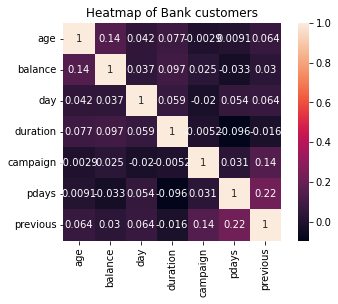

In [22]:
# https://pythonbasics.org/seaborn-heatmap/
sns.heatmap(bank_data.corr(), annot= True, square = True)
plt.title("Heatmap of Bank customers")
plt.show()

There is no significant correlation of features, Few things to note here is age plays a role in balance. Less campaign means more duration.

https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/?utm_content=cmp-true

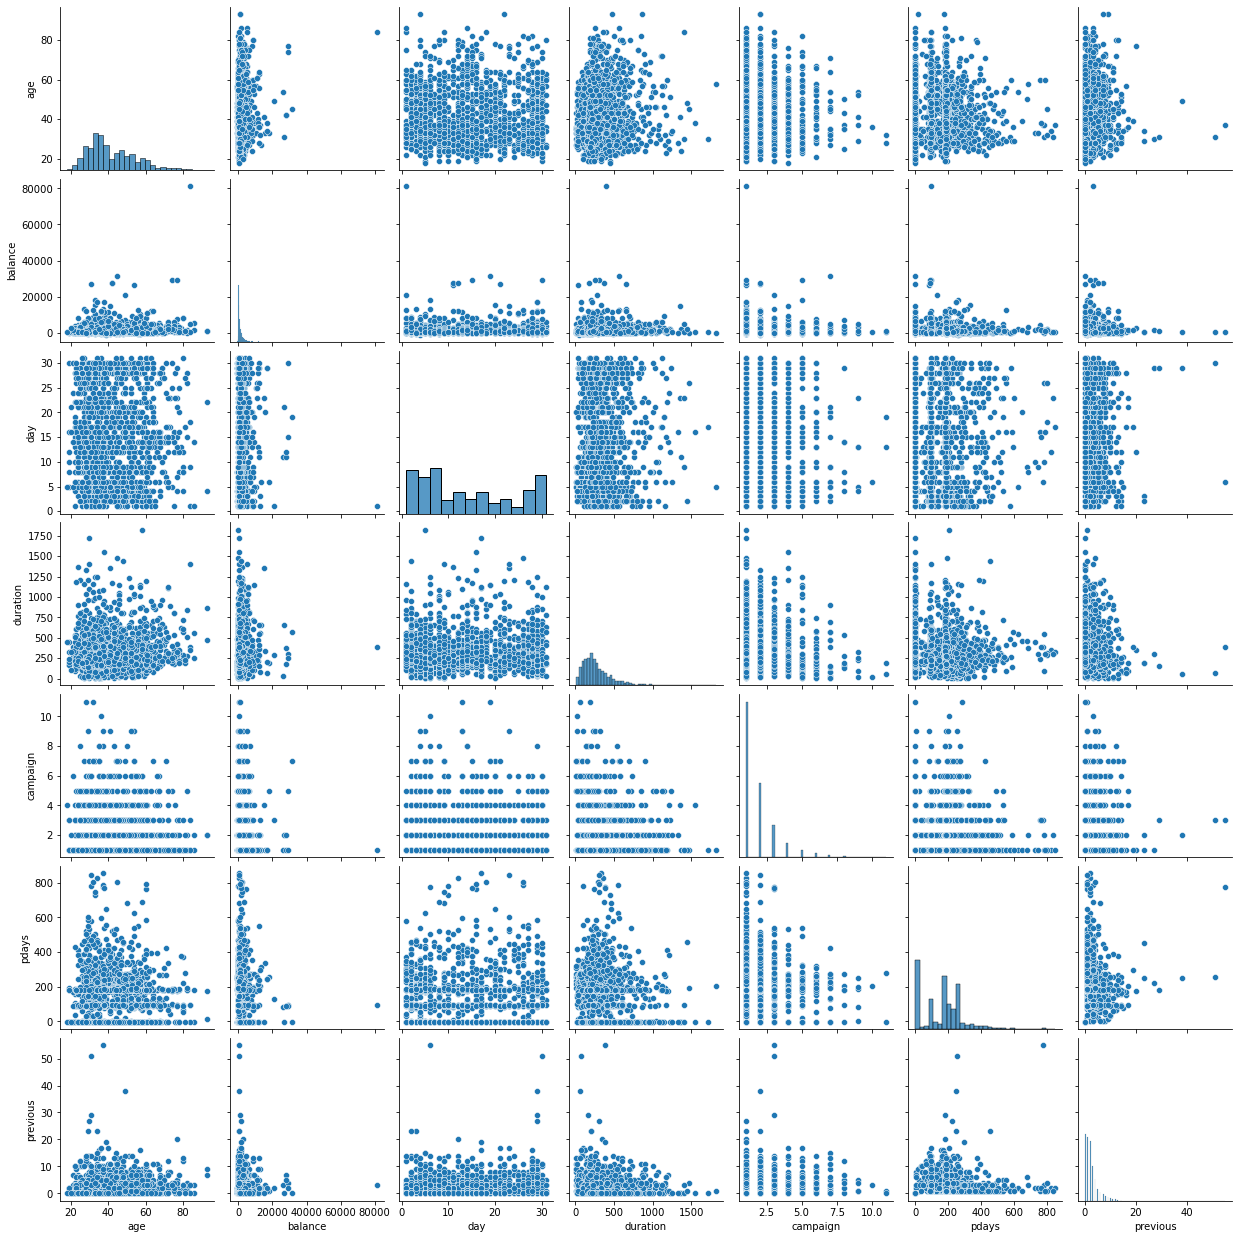

In [24]:
sns.pairplot(data=bank_data[["age", "balance","day","duration", "campaign", "pdays", "previous"]].dropna())
plt.show()

Now lets examine the categorial attributes and assess count/value of each category to understand the spread of it

In [25]:
bank_data.select_dtypes('object').describe()

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

Here too we can see some categories are missing values. Lets us assess each category    

In [26]:
bank_data['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [34]:
print(f'Total job count is {bank_data["job"].count()}, its missing values for {2000-bank_data["job"].count()}')

Total job count is 1990, its missing values for 10


In [28]:
bank_data['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [35]:
print(f'Total marital count is {bank_data["marital"].count()}, its missing values for {2000-bank_data["marital"].count()}')

Total marital count is 2000, its missing values for 0


In [30]:
bank_data['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [36]:
print(f'Total education count is {bank_data["education"].count()}, its missing values for {2000-bank_data["education"].count()}')

Total education count is 1896, its missing values for 104


In [37]:
bank_data['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

In [38]:
print(f'Total default count is {bank_data["default"].count()}, its missing values for {2000-bank_data["default"].count()}')

Total default count is 2000, its missing values for 0


In [39]:
bank_data['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [40]:
print(f'Total housing count is {bank_data["housing"].count()}, its missing values for {2000-bank_data["housing"].count()}')

Total housing count is 2000, its missing values for 0


In [41]:
bank_data['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [42]:
print(f'Total loan count is {bank_data["loan"].count()}, its missing values for {2000-bank_data["loan"].count()}')

Total loan count is 2000, its missing values for 0


In [43]:
bank_data['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [44]:
print(f'Total contact count is {bank_data["contact"].count()}, its missing values for {2000-bank_data["contact"].count()}')

Total contact count is 1809, its missing values for 191


In [ ]:
bank_data['month'].value_counts()

In [45]:
print(f'Total month count is {bank_data["month"].count()}, its missing values for {2000-bank_data["month"].count()}')

Total month count is 2000, its missing values for 0


In [46]:
bank_data['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [47]:
print(f'Total poutcome count is {bank_data["poutcome"].count()}, its missing values for {2000-bank_data["poutcome"].count()}')

Total poutcome count is 1546, its missing values for 454


In [48]:
bank_data['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

In [49]:
print(f'Total subscribed count is {bank_data["subscribed"].count()}, its missing values for {2000-bank_data["subscribed"].count()}')

Total subscribed count is 2000, its missing values for 0


We can see there are missing values in job, education, contact and poutcome. More data is missing in poutcome.

previous outcome could be null or 0 if its first time customer. We need to fill these missing values for the categories

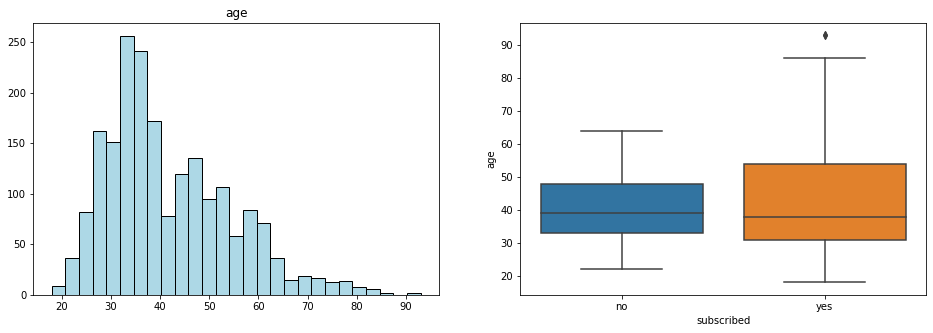

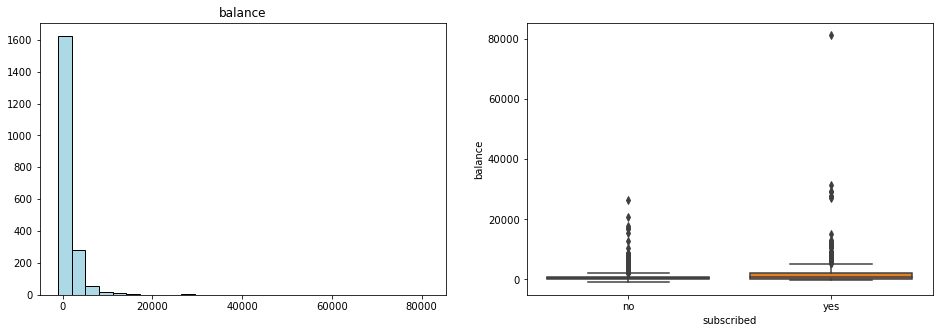

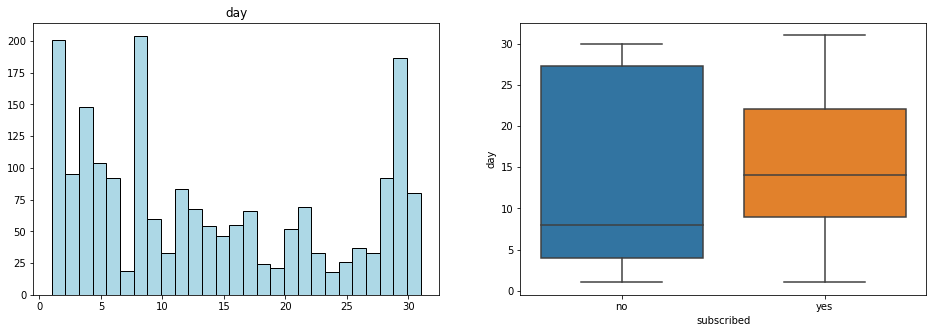

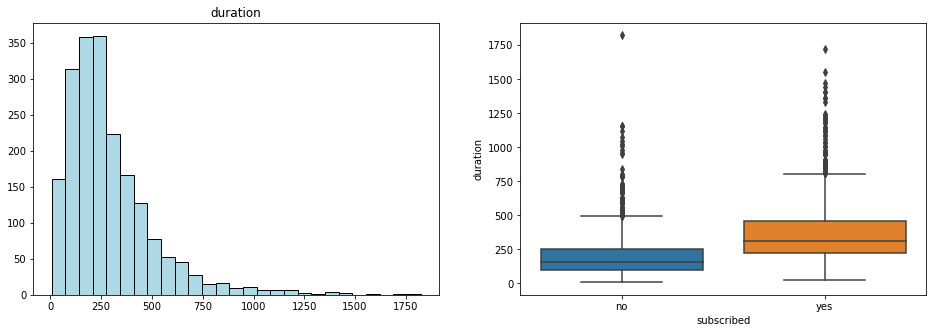

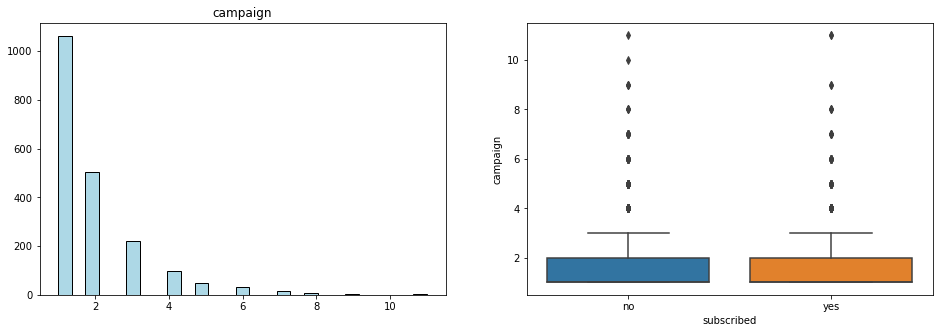

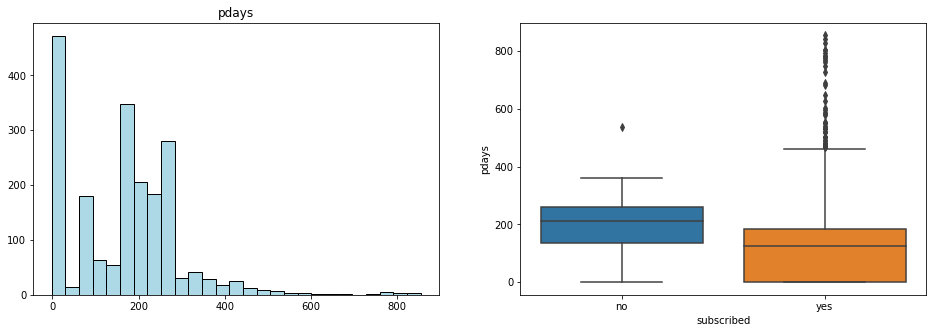

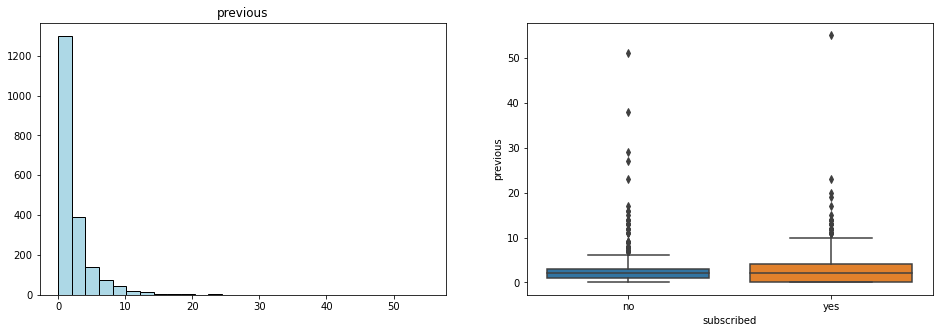

In [71]:
#Distribution of numerical features
#Plotting histogram of numerical features
features_num=["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

for feature in features_num:
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (16,5))
    axs[0].hist(bank_data[feature], bins=27, edgecolor='black', color='lightblue')    
    axs[0].set_title(feature)

    sns.boxplot(data=bank_data, y= feature, x='subscribed', ax= axs[1])
    plt.show()

From the analysis, we could find that

Age => If the age is above 50 and below 60, most of people have subscribed
Day => If days between 10 to 20, more people have subscribed
Duration => If duration is between 250 to 500, more people have subscribed
pDays=> if between 0 to 200, more people have subscribed

Looking at charts, balance, duration, campaign, and pdays are skewed towards left and extreme values are found in some cases

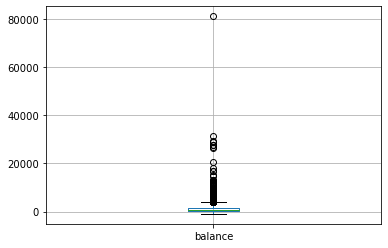

<Figure size 1152x864 with 0 Axes>

In [74]:
bank_data.boxplot(column='balance')
plt.show()

Looking at this data, it looks most of the balance falls between 0 to 10000 (approximately) and some values are much higher

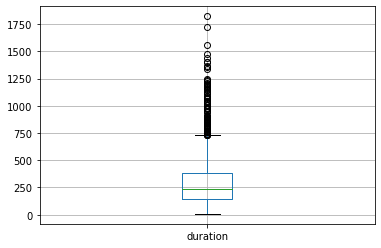

In [75]:
bank_data.boxplot(column='duration')
plt.show()

Looking at this data, it looks most of the duration falls between 750 to 1250 (approximately) and some values are much higher

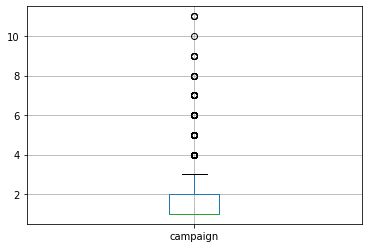

In [76]:
bank_data.boxplot(column='campaign')
plt.show()

Here data is uniformaly spread

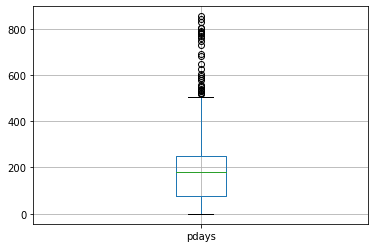

In [77]:
bank_data.boxplot(column='pdays')
plt.show()

We cannot say anything from pdays too

We can pick duration and balance as the primary two features for further analysis.
Most balance could be associated with education and job of a person.

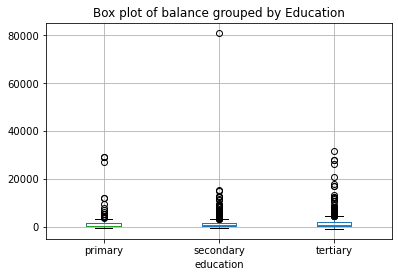

In [81]:
bank_data.boxplot(column='balance', by='education')
plt.title('Box plot of balance grouped by Education')
plt.suptitle("")
plt.show()

There is no big difference in mean salaries between primary, secondary education and tertiary but many in tertiary have high balances

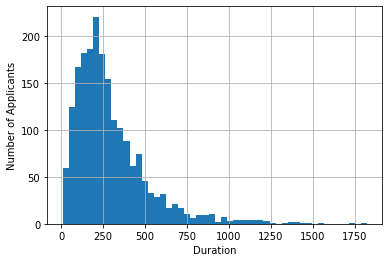

In [83]:
# Next, we examine a histogram of the duration

bank_data['duration'].hist(bins=50)
plt.xlabel("Duration")
plt.ylabel('Number of Applicants')
plt.show()

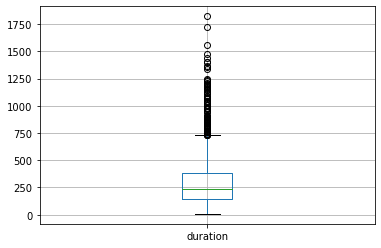

In [84]:
# Boxp lot of LoanAmount
bank_data.boxplot(column='duration')
plt.show()

Duration has extreme values. most of it are concentrated around 750 to 1250. There are some data missing We might need to look into later

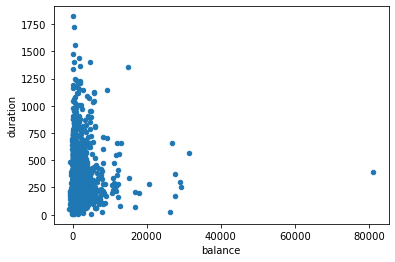

In [85]:
bank_data.plot.scatter(x='balance', y='duration')
plt.show()

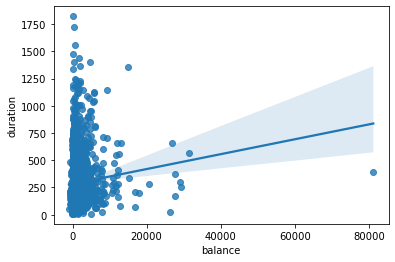

In [86]:
sns.regplot(data=bank_data, x='balance', y='duration')
plt.show()

Duration and balance are closer relation. More the customers spend time with reps, they are more tend to subscribe as well mostly people with good balance spend time with reps

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


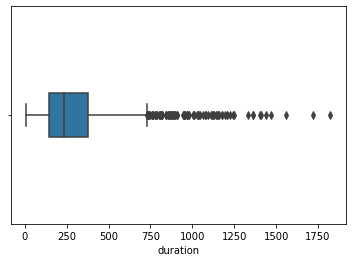

In [87]:
#Box plot variations

#Sea born style plot for duration
sns.boxplot(x= bank_data["duration"], orient = 'v', width=0.2)
plt.show()

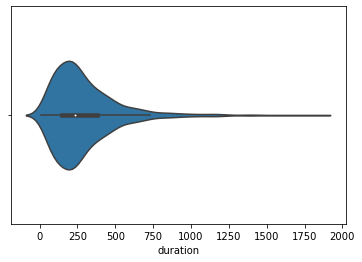

In [89]:
#Violin plot for duration

sns.violinplot(x=bank_data["duration"], orient='v', width=0.5)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


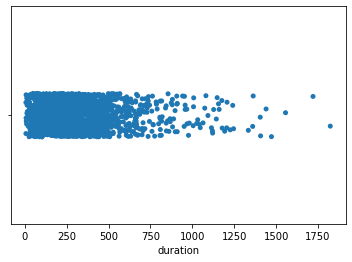

In [90]:
#Strip plot for duration

sns.stripplot(x=bank_data["duration"], jitter=True, orient='v')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


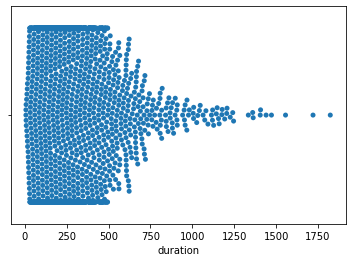

In [91]:
#Swar mplot for duration

sns.swarmplot(x=bank_data["duration"], orient='v')
plt.show()

Lets draw box plots of balance grouped by education as violin plots

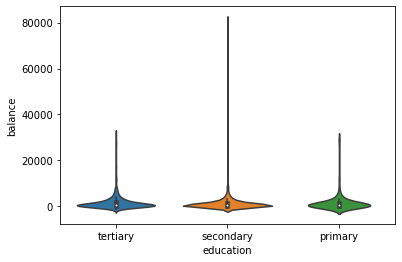

In [92]:
sns.violinplot(data=bank_data, x='education', y='balance')
plt.show()

Lets Compare the categorial values with subscriptions

In [96]:
bank_data_categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "subscribed"]

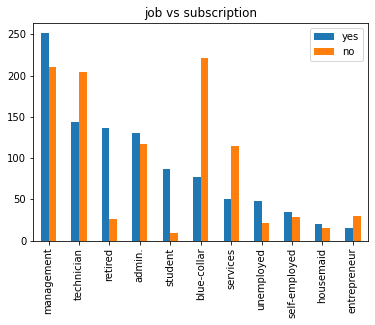

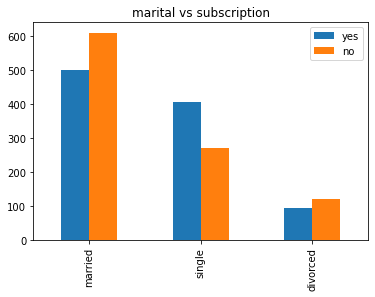

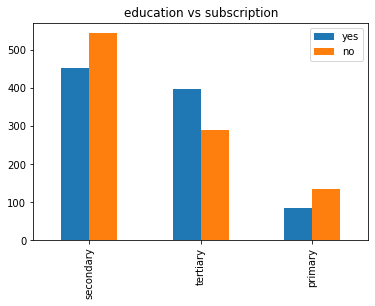

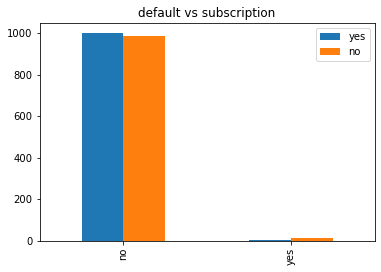

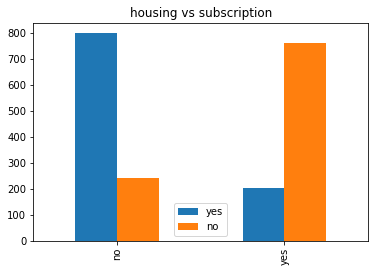

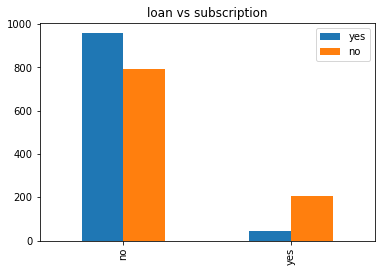

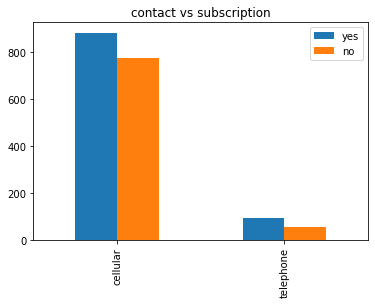

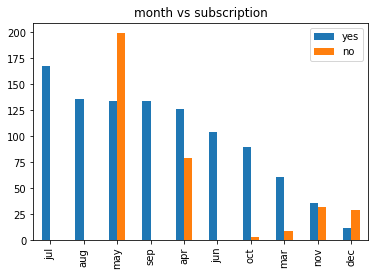

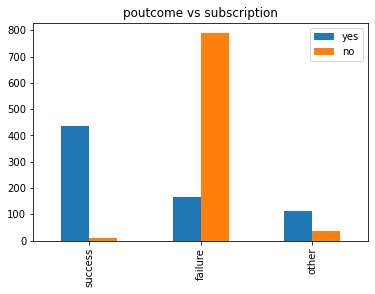

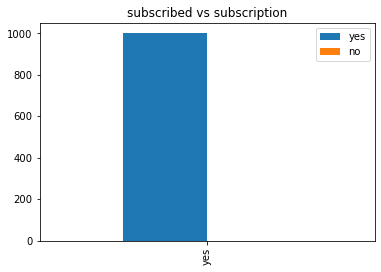

In [100]:
#Pandas dataframe

for feature in bank_data_categories:
    dataframe = pd.DataFrame()
    dataframe["yes"] = bank_data[bank_data["subscribed"] == "yes"][feature].value_counts()
    dataframe["no"] = bank_data[bank_data["subscribed"] == "no"][feature].value_counts()
    dataframe.plot.bar(title = feature + " vs subscription")

From the categories charts, we can clearly see, people who are single has tertiary education, working in management and who are already subscribed has the highest chance of subscribing again

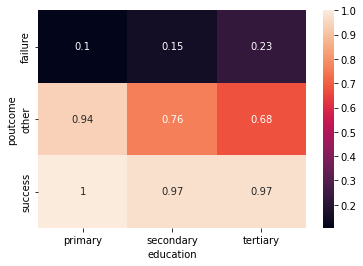

In [104]:
pivot_table = bank_data.pivot_table(values='subscribed',
                                index='poutcome',
                                columns='education',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
sns.heatmap(pivot_table, annot=True)
plt.show()

Again in our final graph, we can see secondary and tertiary education holders, who are previously subsribed has the highest chance of subscribing again